InvalidArgumentError: In[0] is not a matrix. Instead it has shape [25] [Op:MatMul]

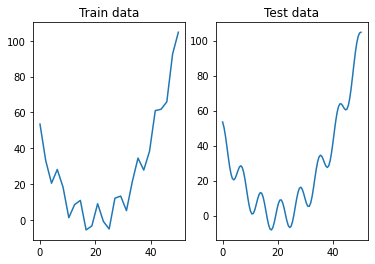

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# exercise A
train_data = np.loadtxt('train.txt');
test_data = np.loadtxt('test.txt');

xtrain = np.float32(train_data[0]);
ytrain = np.float32(train_data[1]);
xtest = np.float32(test_data[0]);
ytest = np.float32(test_data[1]);
m = xtrain.data.shape
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_title('Train data')
ax1.plot(xtrain,ytrain)
ax2.set_title('Test data')
ax2.plot(xtest,ytest)
# exercise B
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)
# Learning rate
learning_rate = 0.01
# Number of loops for training through all your data to update the parameters
n_epochs = 100

X = tf.constant(xtrain,dtype=tf.float32,name = "X")
XT = tf.transpose(X)
y = tf.constant(ytrain,dtype=tf.float32,name = "y")
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT,X)),XT),y)
y_pred = tf.matmul(X,theta,name="predictions")
error = y_pred-y
mse = tf.reduce_mean(tf.square(error),name = "mse")
gradients = 2/m*tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta,theta-learning_rate*gradients)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()